In [28]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
pylab.rcParams['figure.figsize'] = (16, 16)

In [29]:
import cv2

In [30]:
from PIL import Image

In [31]:
import math

In [32]:
dataDir = "data/tiny_set/"
annFile = 'data/tiny_set/erase_with_uncertain_dataset/annotations/tiny_set_test_nobox_cropped.json'
resultFile = 'exp/ctdet_tiny/default/results.json'

In [33]:
with open(resultFile) as f:
    result = json.load(f)
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


In [96]:
imgId = 320 # the image id to check

In [97]:
img_result = list(filter(lambda r: r['image_id'] == imgId, result))
img_result[0]['segmentation'] = []

In [98]:
imgIds = coco.getImgIds(imgIds = [imgId])
img = coco.loadImgs(imgIds)[0]

In [99]:
img

{'file_name': 'labeled_images/youtube_V0005_I0000720.jpg',
 'height': 640,
 'width': 512,
 'id': 320,
 'corner': [0, 640, 512, 1280],
 'image_id': 808}

In [100]:
I = Image.open(f"{dataDir}/test/{img['file_name']}").convert('RGB')
I = I.crop(img['corner'])

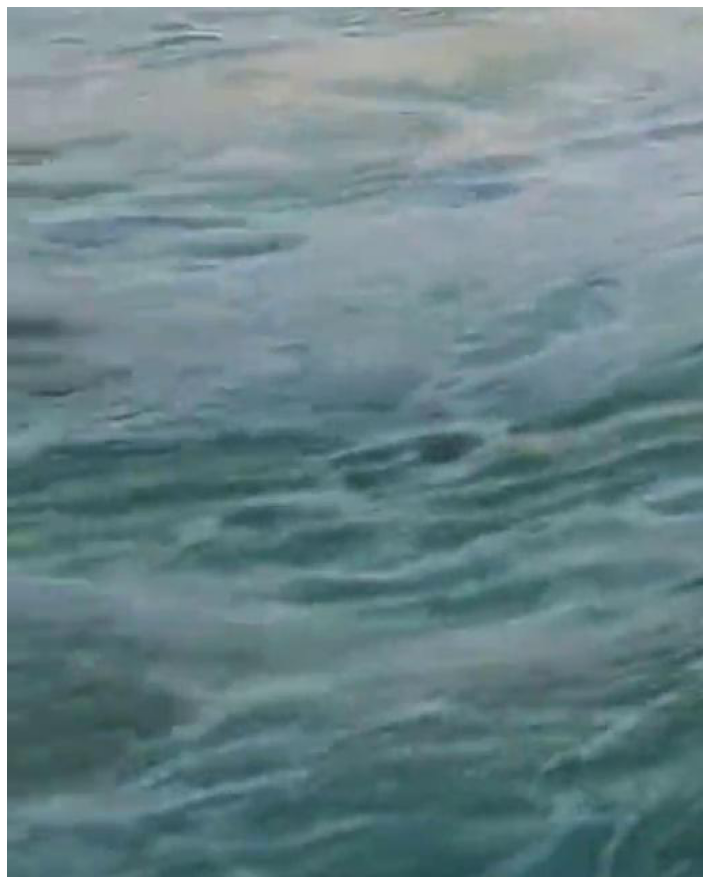

In [101]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
plt.axis('off')
plt.imshow(I)
plt.show()

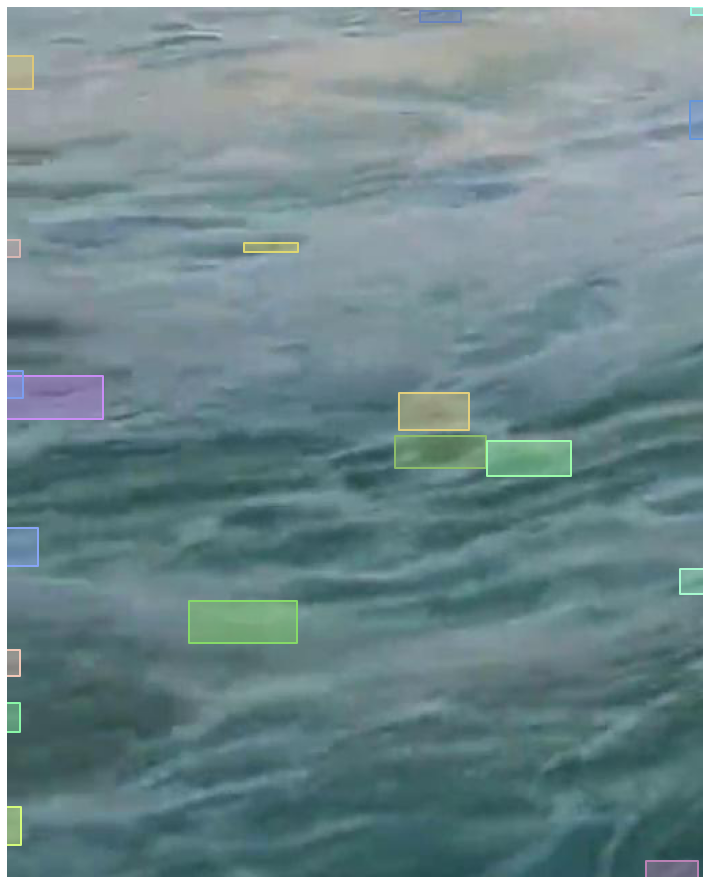

In [102]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
coco.showAnns(img_result, draw_bbox=True)

In [80]:
trans_input = np.array([[ 0.8, -0, 51.2], [0, 0.8, 64]])
inp_width = 512
inp_height = 640

In [81]:
inp_image = cv2.warpAffine(np.array(I), trans_input, (inp_width, inp_height), flags=cv2.INTER_LINEAR)

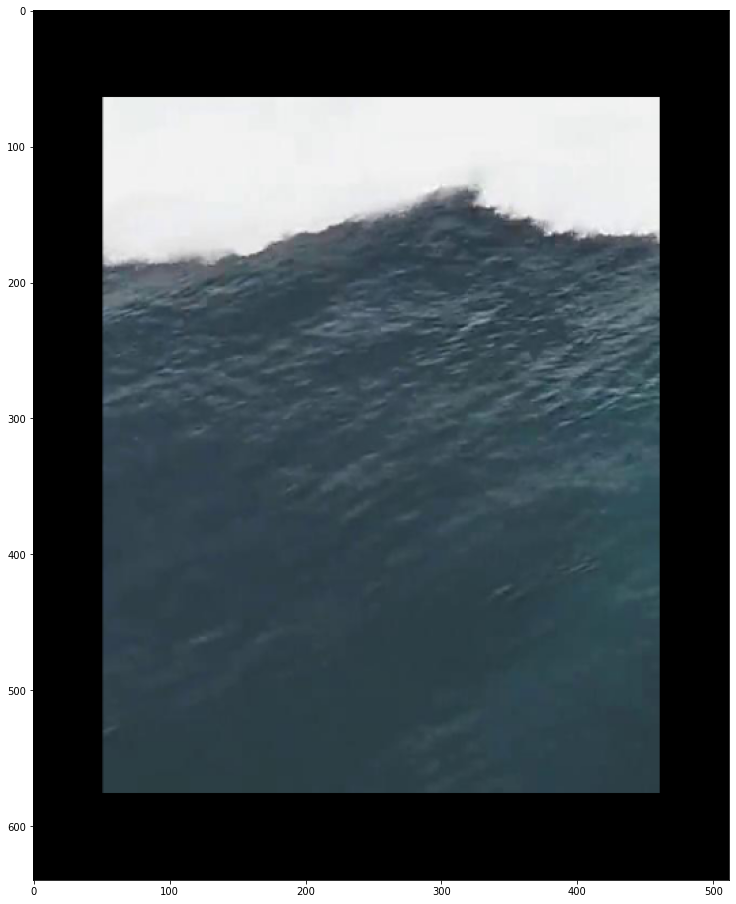

In [82]:
plt.imshow(inp_image)